In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df=pd.read_csv(r"E:\DS-ML-NLP\dataset\economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [17]:
df.drop(columns=['Unnamed: 0','year','month'], axis=1,inplace=True)

In [18]:
df.head(
    
)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [19]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

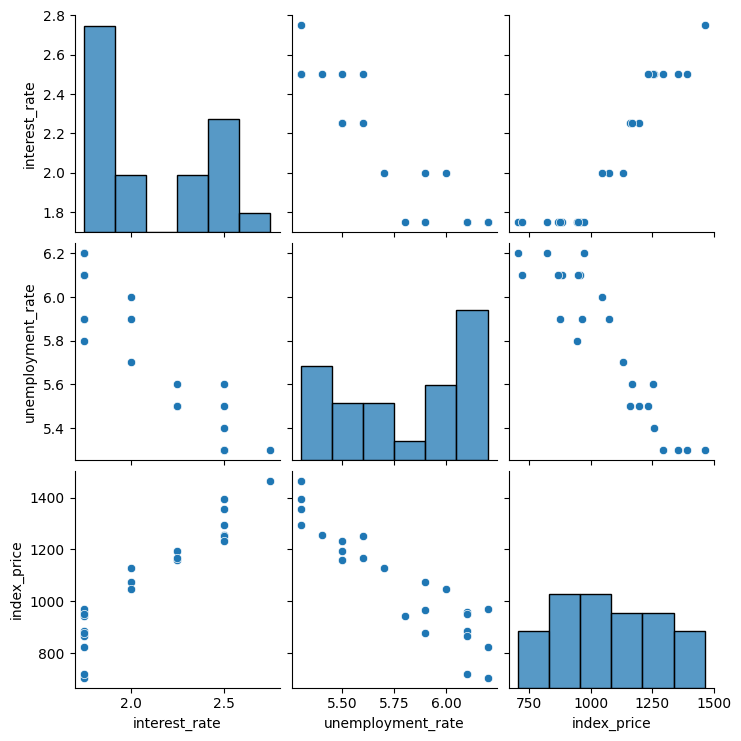

In [20]:
import seaborn as sns
sns.pairplot(df)

In [21]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


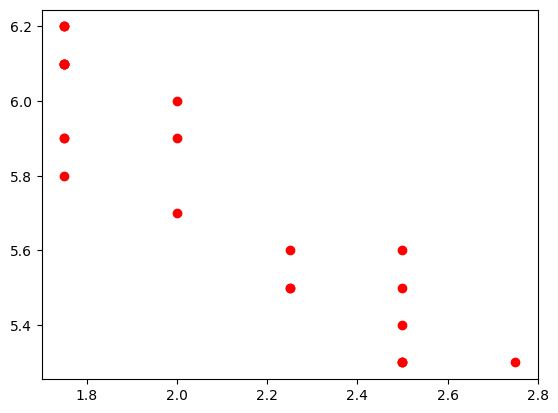

In [22]:
#visualize data point
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')

In [25]:
x=df.iloc[:,:-1]
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [27]:
y=df.iloc[:,-1]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [31]:
#train test split
from sklearn.model_selection import train_test_split
# random_state is used to ensure that the train-test split is reproducible.
# Setting random_state to a fixed value (e.g., 42) means that every time you run the code,
# you will get the same split of data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

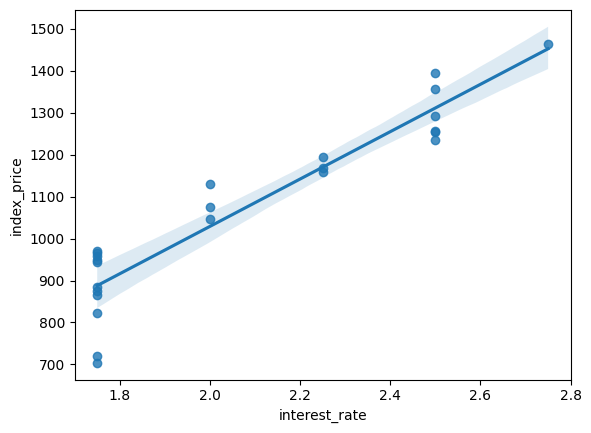

In [33]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

In [34]:
from sklearn.preprocessing import StandardScaler


In [35]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [36]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [37]:
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()

In [38]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(linear_model,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [40]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [41]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [43]:
y_pred=linear_model.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [44]:
## performance matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE : ",mse)
print("MAE : ",mae)
print("RMSE : ",rmse)

MSE :  5793.762887712569
MAE :  59.935781523235484
RMSE :  76.11677139574805


In [46]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("r2 score is : ",score)

r2 score is :  0.8278978091457145


# Assumption

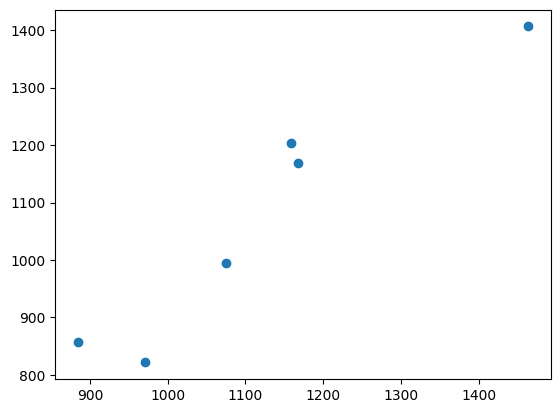

In [47]:
plt.scatter(y_test,y_pred)

In [50]:
reciduals=y_test-y_pred
print(reciduals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


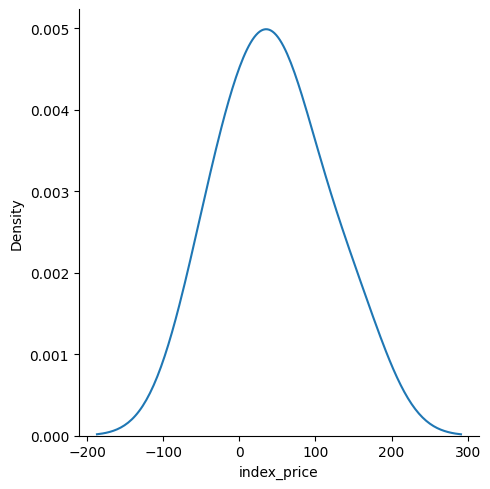

In [51]:
sns.displot(reciduals,kind='kde')

<Axes: ylabel='index_price'>

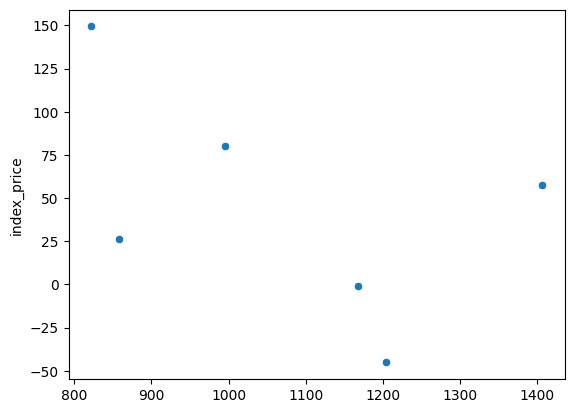

In [53]:
sns.scatterplot(x=y_pred, y=reciduals)

In [57]:
# ols linear regression
%pip install statsmodels
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()



Note: you may need to restart the kernel to use updated packages.


In [58]:
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()

In [60]:
model.summary()

e:\DS-ML-NLP\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 24 Jun 2025   Prob (F-statistic):                       0.754
Time:                        21:16:25   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
print("coefficient ",linear_model.coef_)

coefficient  [  88.27275507 -116.25716066]


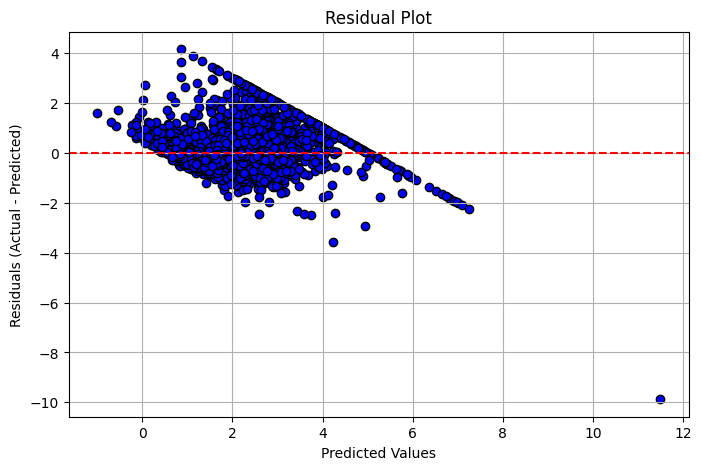

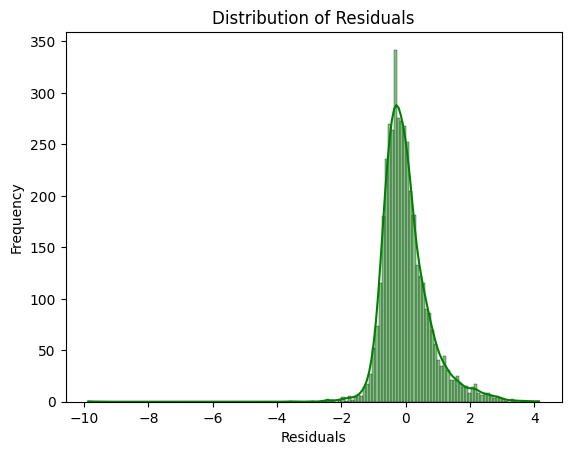

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Load California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Step 2: Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(x_test)

# Step 5: Calculate residuals
residuals = y_test - y_pred

# Step 6: Plot residuals vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='blue', edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# Step 7 (Optional): Residual distribution
sns.histplot(residuals, kde=True, color='green')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
